In [485]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk # SciKit learn package
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/EilonDadon/Data-Science/main/project/forbes_2022_billionaires.csv'
df=pd.read_csv(url)
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [486]:
billio_df = df[['personName','rank','age' , 'finalWorth','category','country','gender','philanthropyScore','selfMade']].copy()
billio_df.isnull().sum()

personName              0
rank                    0
age                    86
finalWorth              0
category                0
country                13
gender                 16
philanthropyScore    2272
selfMade                0
dtype: int64

In [487]:
billio_df.head()

,personName,rank,age,finalWorth,category,country,gender,philanthropyScore,selfMade
0,Elon Musk,1,50.0,219000.0,Automotive,United States,M,1.0,True
1,Jeff Bezos,2,58.0,171000.0,Technology,United States,M,1.0,True
2,Bernard Arnault & family,3,73.0,158000.0,Fashion & Retail,France,M,NaN,False
3,Bill Gates,4,66.0,129000.0,Technology,United States,M,4.0,True
4,Warren Buffett,5,91.0,118000.0,Finance & Investments,United States,M,5.0,True


# Filling all NaN in 'philanthropyScore' to 0

In [488]:
# billio_df['philanthropyScore'].fillna(0, inplace = True)
# billio_df['philanthropyScore'].isnull().sum()

# making a grpah of final worth per country

In [489]:
plt.figure(figsize = (15,15))
country_rank = billio_df.groupby('country')[['finalWorth']].sum().reset_index()
country_rank.columns = country_rank.columns.str.strip() #removing all spaces in the columns
country_rank.sort_values('finalWorth' ,ascending = False,inplace= True)
country_rank.reset_index(drop = True)

,country,finalWorth
0,United States,4753500.0
1,China,2145250.0
2,India,723000.0
3,Germany,498900.0
4,France,454600.0
...,...,...
68,Tanzania,1500.0
69,Nepal,1500.0
70,Bahrain,1500.0
71,Greece,1400.0


<Figure size 1080x1080 with 0 Axes>

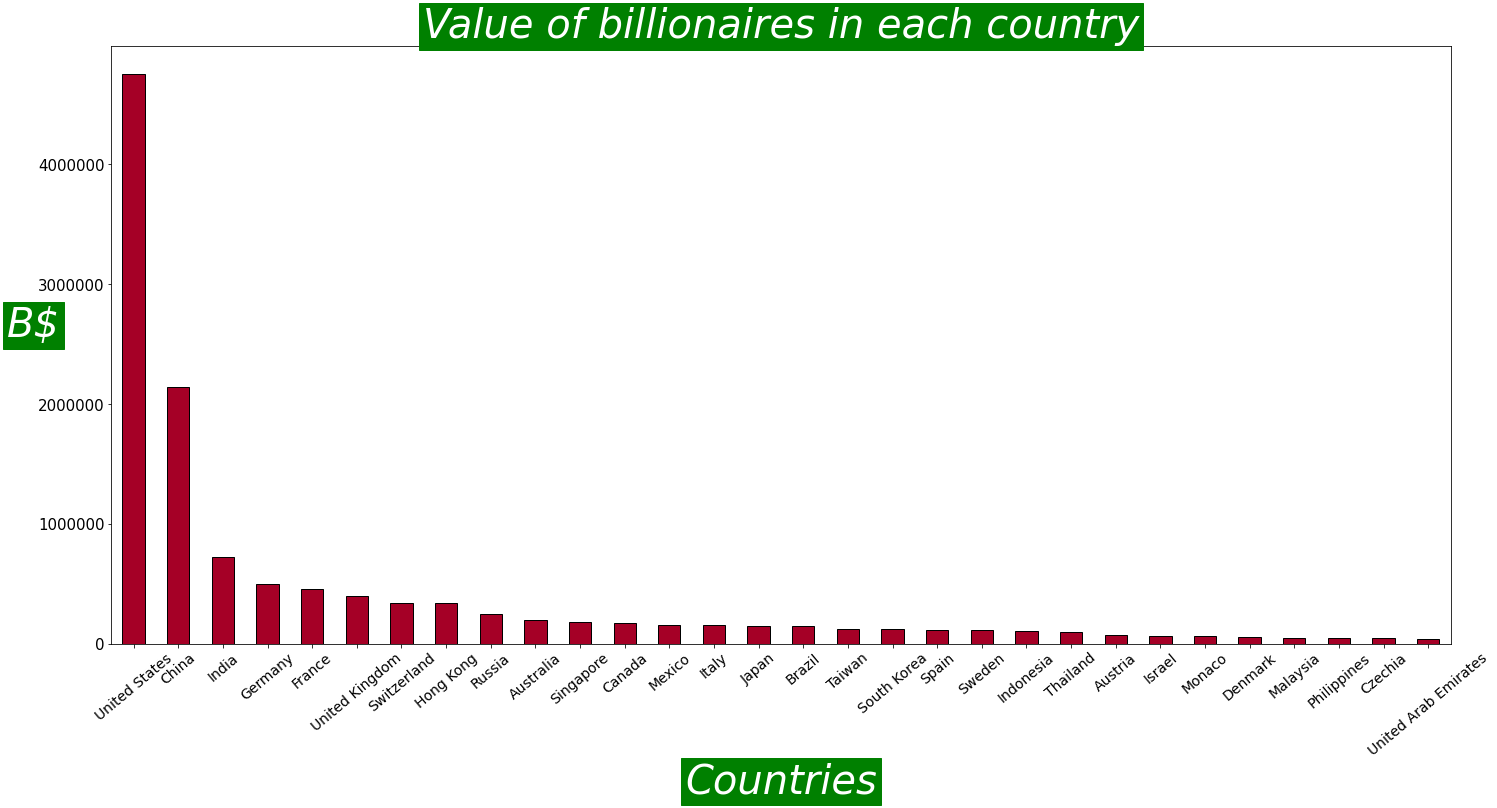

In [490]:
ax = country_rank.head(30).plot(kind = 'bar' , x = 'country' , y = 'finalWorth', figsize = (24,11),rot = 40, colormap = 'RdYlGn' , legend = False, edgecolor = 'black')
plt.title('Value of billionaires in each country', fontsize = 40 , color = 'white',fontstyle = 'italic' , backgroundcolor='green')
ax.set_xlabel('Countries',fontsize=40 ,color = 'white',fontstyle = 'italic' , backgroundcolor='green')
ax.set_ylabel('B$' , fontsize = 40, rotation = 0, color = 'white',fontstyle = 'italic' , backgroundcolor='green')
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14)
plt.show()

In [491]:
billio_df.loc[billio_df['country'] == 'Israel'].value_counts().sum() #we have 24 israelies billioners in the list

0

In [492]:
g=billio_df.groupby('age')[['category']].count()

In [493]:
billio_df['age'].dropna(inplace = True)
billio_df['age_group'] = billio_df['age'].copy()

for i in range (len(billio_df['age_group'])): 
    age = billio_df['age_group'][i]
    if 0<age<10:
        billio_df['age_group'][i] = '0-10'
    if 10<=age<20:
        billio_df['age_group'][i] = '10-20'
    if 20<=age<30:
        billio_df['age_group'][i] = '20-30'
    if 30<=age<40:
        billio_df['age_group'][i] = '30-40'
    if 40<=age<50:
        billio_df['age_group'][i] = '40-50'
    if 50<=age<60:
        billio_df['age_group'][i] = '50-60'
    if 60<=age<70:
        billio_df['age_group'][i] = '60-70'
    if 70<=age<80:
        billio_df['age_group'][i] = '70-80'
    if 80<=age<90:
        billio_df['age_group'][i] = '80-90'
    if 90<=age<100:
        billio_df['age_group'][i] = '90-100'
    if 100<=age<110:
        billio_df['age_group'][i] = '100-110'
    if 110<=age<120:
        billio_df['age_group'][i] = '110-120'

C:\Users\eilon\AppData\Local\Temp\ipykernel_24884\499913706.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billio_df['age_group'][i] = '50-60'


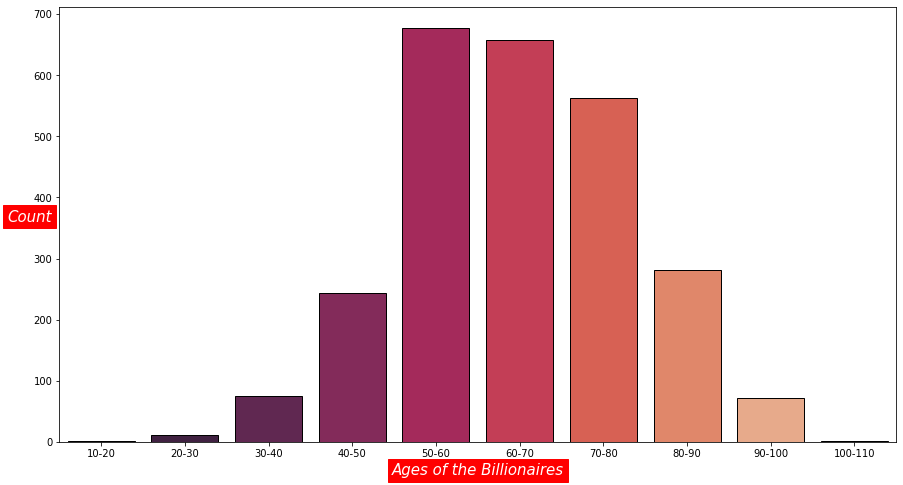

In [494]:
billio_df.sort_values('age' , ascending = True , inplace = True)
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'age_group' , data = billio_df ,palette = 'rocket' , edgecolor = 'black')
ax.set_xlabel('Ages of the Billionaires',fontsize = 15,color = 'white',fontstyle = 'italic' , backgroundcolor='red')
ax.set_ylabel('Count', fontsize = 15 ,rotation = 0 ,color = 'white',fontstyle = 'italic' , backgroundcolor='red' ) 
plt.show()

## craeting df for each gender

In [495]:
female=billio_df[billio_df.gender=='F']
female = female.groupby('category')[['finalWorth']].sum()
female.sort_values('finalWorth',ascending = False,inplace = True)
female.reset_index(inplace = True)

In [496]:
male=billio_df[billio_df.gender=='M']
male = female.groupby('category')[['finalWorth']].sum()
male.sort_values('finalWorth',ascending = False,inplace = True)
male.reset_index(inplace = True)

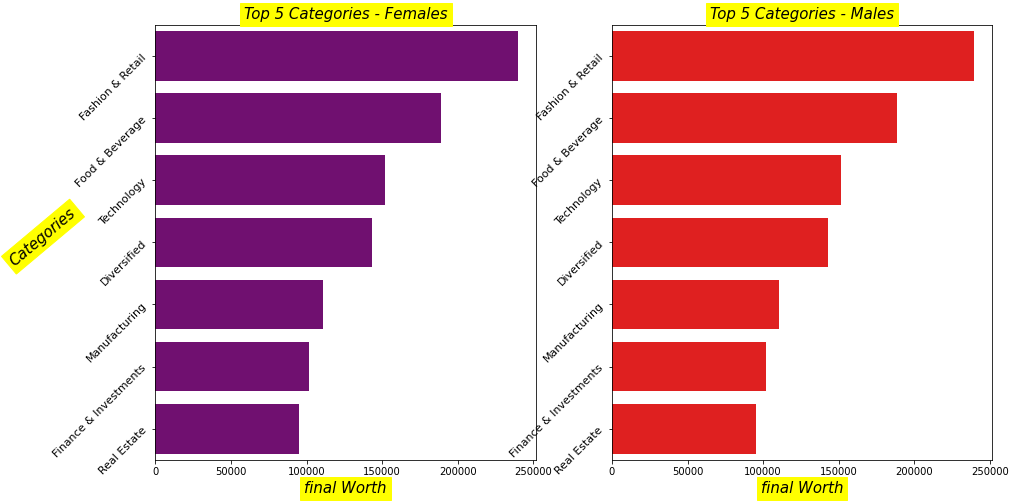

In [504]:
fig, axes = plt.subplots(figsize=(15,8), ncols=2)
female_plot = sns.barplot(data = female.head(7).sort_values('finalWorth' , ascending = False),x = 'finalWorth' ,y = 'category' , ax = axes[0],color = 'purple' )
male_plot = sns.barplot(data = male.head(7).sort_values('finalWorth' , ascending = False),x = 'finalWorth',y = 'category' , ax = axes[1], color = 'red')

male_plot.set_yticklabels(male_plot.get_yticklabels(),rotation = 45 , size = 11)
female_plot.set_yticklabels(female_plot.get_yticklabels(),rotation = 45 , size = 11)

male_plot.set_xlabel('final Worth',fontsize = 15,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center')
male_plot.set_ylabel(None) 

female_plot.set_xlabel('final Worth',fontsize = 15,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center')
female_plot.set_ylabel('Categories', fontsize = 15 ,rotation = 40 ,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' ) 

male_plot.set_title('Top 5 Categories - Males', fontsize = 15 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
female_plot.set_title('Top 5 Categories - Females', fontsize = 15 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
plt.show()

# philantropy score by category and age in US

#### First, we made a data frame with no nulls, of philanthropy scores in US by category and age

In [498]:
phil_df = billio_df
phil_df['age'].dropna(inplace = True)
phil_df.loc[phil_df['country'] == 'United States'].reset_index(drop = True).head()

,personName,rank,age,finalWorth,category,country,gender,philanthropyScore,selfMade,age_group
0,Pedro Franceschi,1929,25.0,1500.0,Finance & Investments,United States,M,NaN,True,20-30
1,Henrique Dubugras,1929,26.0,1500.0,Finance & Investments,United States,M,NaN,True,20-30
2,Austin Russell,1818,27.0,1600.0,Automotive,United States,M,NaN,True,20-30
3,Ryan Breslow,1513,27.0,2000.0,Technology,United States,M,NaN,True,20-30
4,Andy Fang,2448,29.0,1100.0,Technology,United States,M,NaN,True,20-30


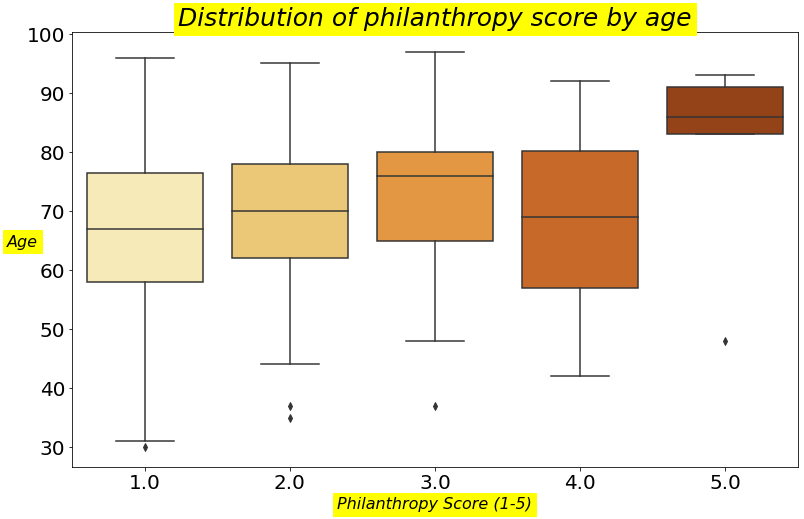

In [499]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data = phil_df , x = 'philanthropyScore' , y = 'age' , palette = 'YlOrBr')
ax.set_xlabel('Philanthropy Score (1-5)',fontsize = 16,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
ax.set_ylabel('Age', fontsize = 16 ,rotation = 0 ,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center' ) 
plt.title('Distribution of philanthropy score by age', fontsize = 25 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

##### conclusion: if we want to fund-raise in US, best go to rich people who are 80 and higher

#### philanthropy score by category 

In [520]:
phil_grouped = phil_df.groupby('category')[['philanthropyScore']].mean()
phil_grouped.sort_values('philanthropyScore', inplace = True)
phil_grouped.reset_index(inplace = True)
phil_grouped.dropna(inplace = True)
phil_grouped

,category,philanthropyScore
0,Construction & Engineering,1.000000
1,Food & Beverage,1.363636
2,Manufacturing,1.615385
3,Sports,1.687500
4,Fashion & Retail,1.689655
5,Service,1.692308
6,Gambling & Casinos,1.750000
7,Logistics,1.750000
8,Real Estate,1.766667
9,Automotive,1.833333


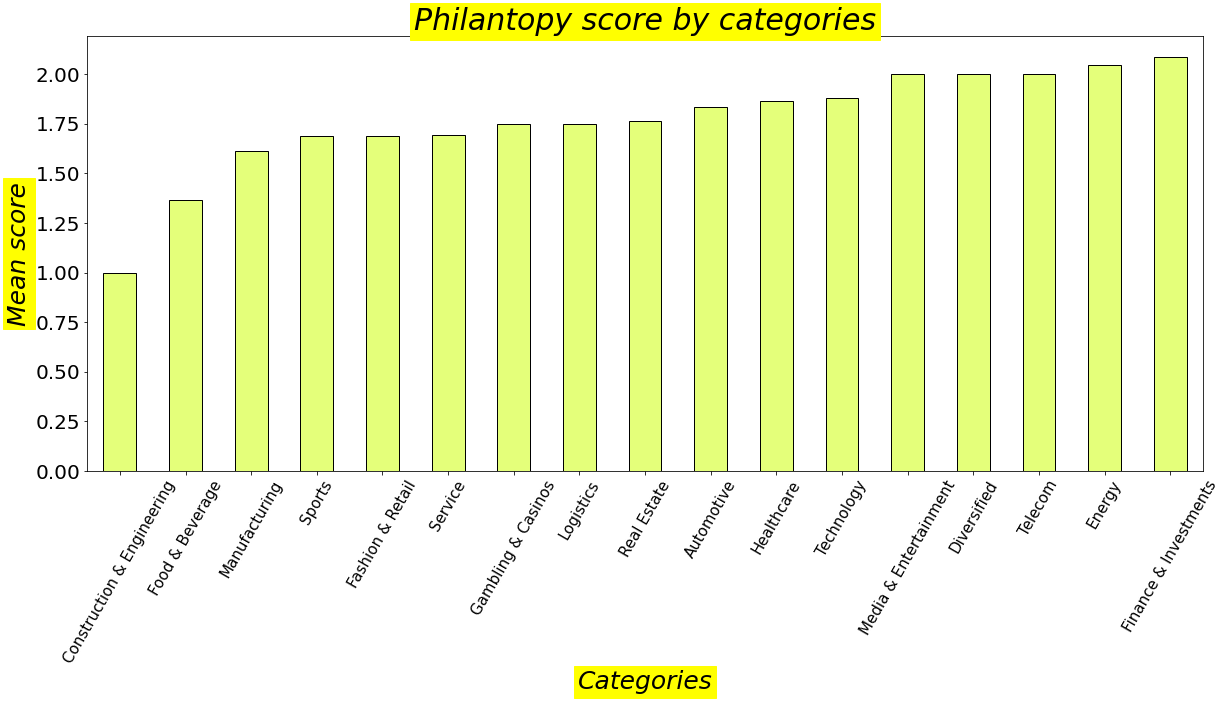

In [521]:
ax = phil_grouped.plot(kind = 'bar' , x = 'category' , y = 'philanthropyScore', figsize = (20,8),rot = 40, colormap = 'Wistia' , legend = False, edgecolor = 'black')
plt.title('Philantopy score by categories', fontsize = 30 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
ax.set_xlabel('Categories',fontsize=25 ,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
ax.set_ylabel('Mean score' , fontsize = 25, rotation = 90, color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center')
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 15 , rotation = 60)
plt.show()

##### conclusion: if we want to fund-raise in US, best to go to Finance & Investment rich people

# Prediction 

In [502]:
billio_features = billio_df[['age','category' , 'gender' , 'philanthropyScore', 'selfMade']]
pred_label =billio_df['finalWorth']
pd.get_dummies(billio_features)


,age,philanthropyScore,selfMade,category_Automotive,category_Construction & Engineering,category_Diversified,category_Energy,category_Fashion & Retail,category_Finance & Investments,category_Food & Beverage,...,category_Manufacturing,category_Media & Entertainment,category_Metals & Mining,category_Real Estate,category_Service,category_Sports,category_Technology,category_Telecom,gender_F,gender_M
1311,19.0,NaN,False,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2190,25.0,NaN,False,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2062,25.0,NaN,False,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1975,25.0,NaN,True,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2191,26.0,NaN,False,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,NaN,NaN,True,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2554,NaN,NaN,True,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2556,NaN,NaN,True,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2572,NaN,NaN,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
